# Map the most limiting factor for each phytoplankton group
Here I clamp all nutrients into one category

In [1]:
%matplotlib inline
import warnings
warnings.simplefilter("ignore") # Silence warnings
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import hvplot.xarray
import xarray as xr
import cartopy
import cartopy.crs as ccrs
import numpy as np
from matplotlib.pyplot import figure
import pylab 
from cartopy.util import add_cyclic_point
import matplotlib as mpl

# Scientific libraries
from numpy import arange,array,ones
from scipy import stats

import scipy.io as sio

In [2]:
ds = xr.open_dataset('/glade/work/gabyn/MARBL_spectra/remapgrid.out1.nc')

In [3]:
limiting= sio.loadmat('mat_files/most_limiting_surf_index.mat')
diaz_index = limiting['diaz_index']
pp_index = limiting['pp_index']
mp4_index = limiting['mp4_index']
mp3_index = limiting['mp3_index']
mp2_index = limiting['mp2_index']
mp1_index = limiting['mp1_index']
diat1_index = limiting['diat1_index']
diat2_index = limiting['diat2_index']
diat3_index = limiting['diat3_index']

In [4]:
from matplotlib.colors import LinearSegmentedColormap
colors = [(0.9994925028835063, 0.9192618223760093, 0.6061361014994233),(0.45066769191336664, 0.7509983339741125, 0.7703857490708702),(0.6825187635707243, 0.810691907283208, 0.6352470180118206)]

cmap_name = 'my_list'
cm = LinearSegmentedColormap.from_list(
        cmap_name, colors, N=3)

## Global, summer and winter

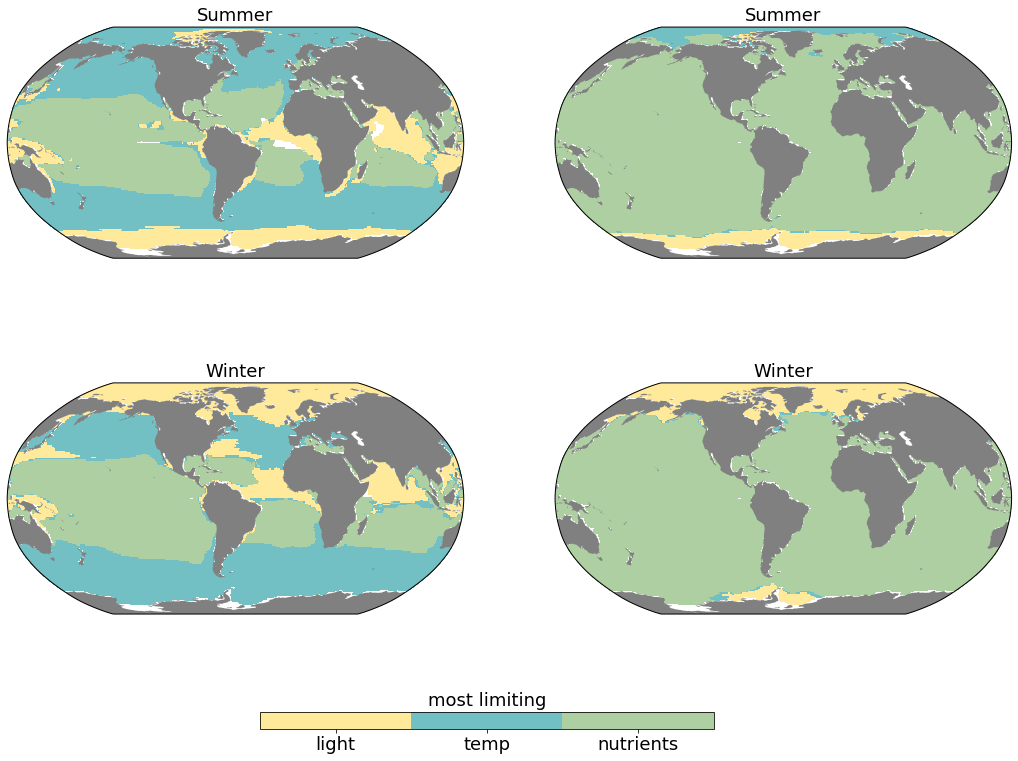

In [5]:
# levels
levels = [0, 0.9, 1.9, 2.9]

# figure 
fig = plt.figure(figsize=(18, 12))
lat = ds.lat

# Winter 
ax2 = fig.add_subplot(2, 2, 1, projection=ccrs.Robinson(central_longitude=305.0))
summer, lon = add_cyclic_point(np.nanmean(pp_index[5:8,:,:], axis=0), coord=ds.lon, axis=1)
cf = ax2.pcolor(lon, lat, summer, cmap=cm,vmin =0, vmax =3, transform=ccrs.PlateCarree())
land = ax2.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax2.set_title('Summer',fontsize = 18)

# Spring 
ax2 = fig.add_subplot(2, 2, 2, projection=ccrs.Robinson(central_longitude=305.0))
summer, lon = add_cyclic_point(np.nanmean(diat3_index[5:8,:,:], axis=0), coord=ds.lon, axis=1)
cf = ax2.pcolor(lon, lat, summer, cmap=cm,vmin =0, vmax =3, transform=ccrs.PlateCarree())
land = ax2.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax2.set_title('Summer',fontsize = 18)

# Summer 
ax = fig.add_subplot(2, 2, 3, projection=ccrs.Robinson(central_longitude=305.0))
winter, lon = add_cyclic_point(np.nanmean(pp_index[list(range(2)) + [-1]], axis=0), coord=ds.lon, axis=1)
cf = ax.pcolor(lon, lat, winter, cmap=cm,vmin =0, vmax =3, transform=ccrs.PlateCarree())
land = ax.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax.set_title('Winter',fontsize = 18)
# Fall 
ax = fig.add_subplot(2, 2, 4, projection=ccrs.Robinson(central_longitude=305.0))
winter, lon = add_cyclic_point(np.nanmean(diat3_index[list(range(2)) + [-1]], axis=0), coord=ds.lon, axis=1)
cf = ax.pcolor(lon, lat, winter, cmap=cm,vmin =0, vmax =3, transform=ccrs.PlateCarree())
land = ax.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax.set_title('Winter',fontsize = 18)

# colorbar and labels
cbar_ax = fig.add_axes([0.32, 0.03, 0.35, 0.02])
cbar = fig.colorbar(cf, cax=cbar_ax, shrink=0.5, spacing='uniform',ticks=[0.5,1.5,2.5,3.5],orientation="horizontal")
cbar.ax.set_xticklabels(['light','temp', 'nutrients'],fontsize = 18)
cbar.ax.set_title('most limiting', fontsize = 18)

fig.savefig('surf_lim_LD_pp_global.png')

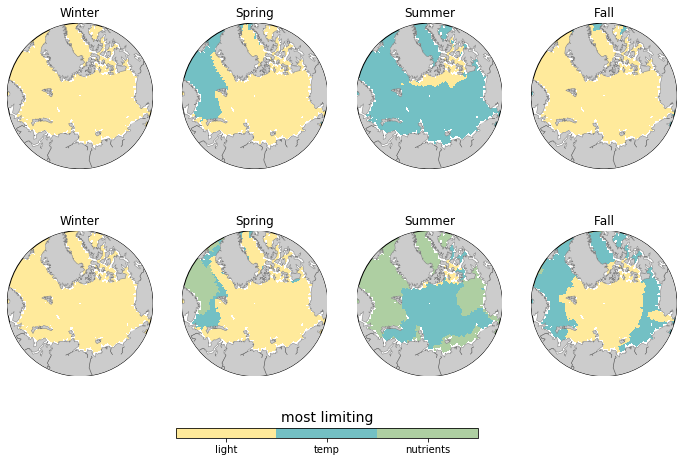

In [11]:
fig = plt.figure(figsize=(12,7))
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
x, y = m(*np.meshgrid(ds.lon,ds.lat))

# Winter
ax = fig.add_subplot(241) 
ax.set_title("Winter")
m.pcolormesh(x,y,np.nanmean(pp_index[list(range(2)) + [-1]], axis=0),shading='flat',cmap=cm, vmin =0, vmax =3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


# Spring
ax = fig.add_subplot(242) 
ax.set_title("Spring")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.pcolormesh(x,y,np.nanmean(pp_index[2:5,:,:], axis=0),shading='flat',cmap=cm,vmin =0, vmax =3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


# Summer
ax = fig.add_subplot(243) 
ax.set_title("Summer")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
im = m.pcolormesh(x,y,np.nanmean(pp_index[5:8,:,:], axis=0),shading='flat',cmap=cm,vmin =0, vmax =3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)

# Fall
ax = fig.add_subplot(244) 
ax.set_title("Fall")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
im = m.pcolormesh(x,y,np.nanmean(pp_index[8:11,:,:], axis=0),shading='flat',cmap=cm,vmin =0, vmax =3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)

# Winter
ax = fig.add_subplot(245) 
ax.set_title("Winter")
m.pcolormesh(x,y,np.nanmean(diat3_index[list(range(2)) + [-1]], axis=0),shading='flat',cmap=cm, vmin =0, vmax =3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


# Spring
ax = fig.add_subplot(246) 
ax.set_title("Spring")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.pcolormesh(x,y,np.nanmean(diat3_index[2:5,:,:], axis=0),shading='flat',cmap=cm,vmin =0, vmax =3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


# Summer
ax = fig.add_subplot(247) 
ax.set_title("Summer")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
im = m.pcolormesh(x,y,np.nanmean(diat3_index[5:8,:,:], axis=0),shading='flat',cmap=cm,vmin =0, vmax =3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)

# Fall
ax = fig.add_subplot(248) 
ax.set_title("Fall")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
im = m.pcolormesh(x,y,np.nanmean(diat3_index[8:11,:,:], axis=0),shading='flat',cmap=cm,vmin =0, vmax =3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)

cbar_ax = fig.add_axes([0.32, 0.03, 0.35, 0.02])
cbar = fig.colorbar(cf, cax=cbar_ax, shrink=0.5, spacing='uniform',ticks=[0.5,1.5,2.5,3.5],orientation="horizontal")
cbar.ax.set_xticklabels(['light','temp', 'nutrients'])
cbar.ax.set_title('most limiting', fontsize = 14)
m.plot
plt.show()
fig.savefig('surf_lim_pp_LD_ao.png')

## Diazotrophs

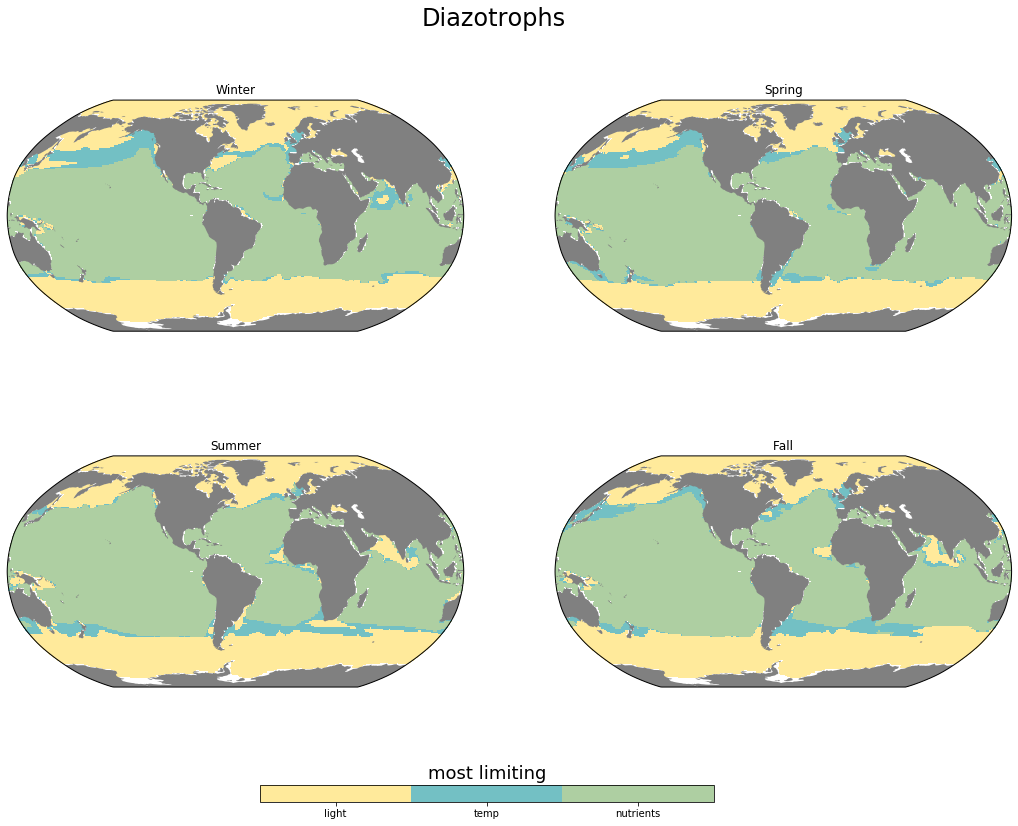

In [38]:
# levels
levels = [0, 0.9, 1.9, 2.9]

# figure 
fig = plt.figure(figsize=(18, 12))
lat = ds.lat

# Winter 
ax = fig.add_subplot(2, 2, 1, projection=ccrs.Robinson(central_longitude=305.0))
winter, lon = add_cyclic_point(np.nanmean(diaz_index[list(range(2)) + [-1]], axis=0), coord=ds.lon, axis=1)
cf = ax.pcolor(lon, lat, winter, cmap=cm,vmin =0, vmax =3, transform=ccrs.PlateCarree())
land = ax.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax.set_title('Winter')

# Spring 
ax1 = fig.add_subplot(2, 2, 2 , projection=ccrs.Robinson(central_longitude=305.0))
spring, lon = add_cyclic_point(np.nanmean(diaz_index[2:5,:,:], axis=0), coord=ds.lon, axis=1)
cf = ax1.pcolor(lon, lat, spring, cmap=cm, vmin =0, vmax =3,transform=ccrs.PlateCarree())
land = ax1.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax1.set_title('Spring')

# Summer 
ax2 = fig.add_subplot(2, 2, 3, projection=ccrs.Robinson(central_longitude=305.0))
summer, lon = add_cyclic_point(np.nanmean(diaz_index[5:8,:,:], axis=0), coord=ds.lon, axis=1)
cf = ax2.pcolor(lon, lat, summer, cmap=cm,vmin =0, vmax =3, transform=ccrs.PlateCarree())
land = ax2.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax2.set_title('Summer')

# Fall 
ax2 = fig.add_subplot(2, 2, 4, projection=ccrs.Robinson(central_longitude=305.0))
fall, lon = add_cyclic_point(np.nanmean(diaz_index[8:11,:,:], axis=0), coord=ds.lon, axis=1)
cf = ax2.pcolor(lon, lat, fall, cmap=cm, vmin =0, vmax =3, transform=ccrs.PlateCarree())
land = ax2.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax2.set_title('Fall')

# colorbar and labels
cbar_ax = fig.add_axes([0.32, 0.03, 0.35, 0.02])
cbar = fig.colorbar(cf, cax=cbar_ax, shrink=0.5, spacing='uniform',ticks=[0.5,1.5,2.5,3.5],orientation="horizontal")
cbar.ax.set_xticklabels(['light','temp', 'nutrients'])
cbar.ax.set_title('most limiting', fontsize = 18)
fig.suptitle('Diazotrophs', x=0.5, y=.95,fontsize=24)

fig.savefig('surf_lim_diaz.png')

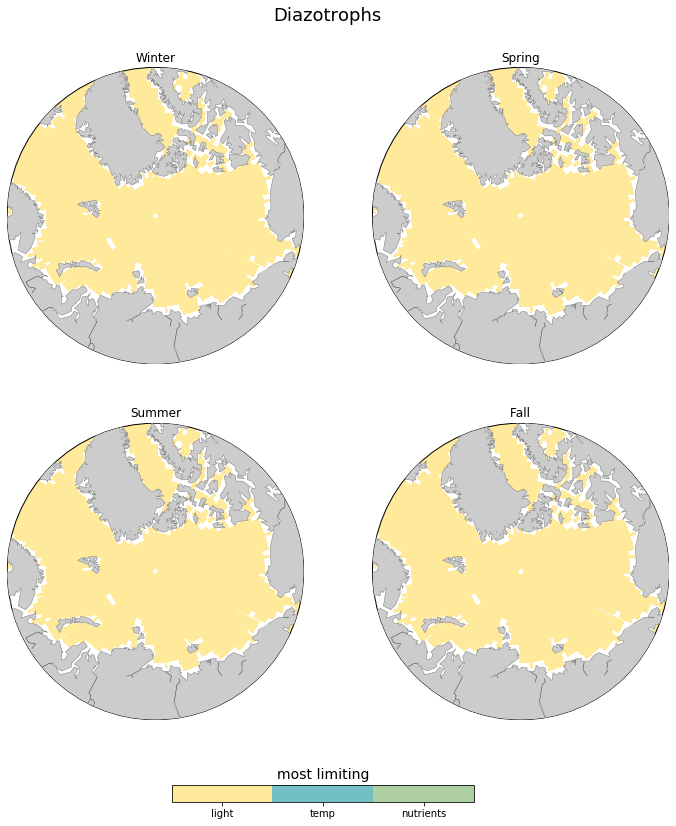

In [33]:
fig = plt.figure(figsize=(12,12))
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
x, y = m(*np.meshgrid(ds.lon,ds.lat))

# Winter
ax = fig.add_subplot(221) 
ax.set_title("Winter")
m.pcolormesh(x,y,np.nanmean(diaz_index[list(range(2)) + [-1]], axis=0),shading='flat',cmap=cm, vmin =0, vmax =3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


# Spring
ax = fig.add_subplot(222) 
ax.set_title("Spring")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.pcolormesh(x,y,np.nanmean(diaz_index[2:5,:,:], axis=0),shading='flat',cmap=cm,vmin =0, vmax =3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


# Summer
ax = fig.add_subplot(223) 
ax.set_title("Summer")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
im = m.pcolormesh(x,y,np.nanmean(diaz_index[5:8,:,:], axis=0),shading='flat',cmap=cm,vmin =0, vmax =3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)

# Fall
ax = fig.add_subplot(224) 
ax.set_title("Fall")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
im = m.pcolormesh(x,y,np.nanmean(diaz_index[8:11,:,:], axis=0),shading='flat',cmap=cm,vmin =0, vmax =3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)

fig.suptitle('Diazotrophs', x=0.5, y=.95,fontsize=18)
cbar_ax = fig.add_axes([0.32, 0.03, 0.35, 0.02])
cbar = fig.colorbar(cf, cax=cbar_ax, shrink=0.5, spacing='uniform',ticks=[0.5,1.5,2.5,3.5],orientation="horizontal")
cbar.ax.set_xticklabels(['light','temp', 'nutrients'])
cbar.ax.set_title('most limiting', fontsize = 14)
m.plot
plt.show()

fig.savefig('surf_lim_diaz_ao.png')

## Picoplankton 

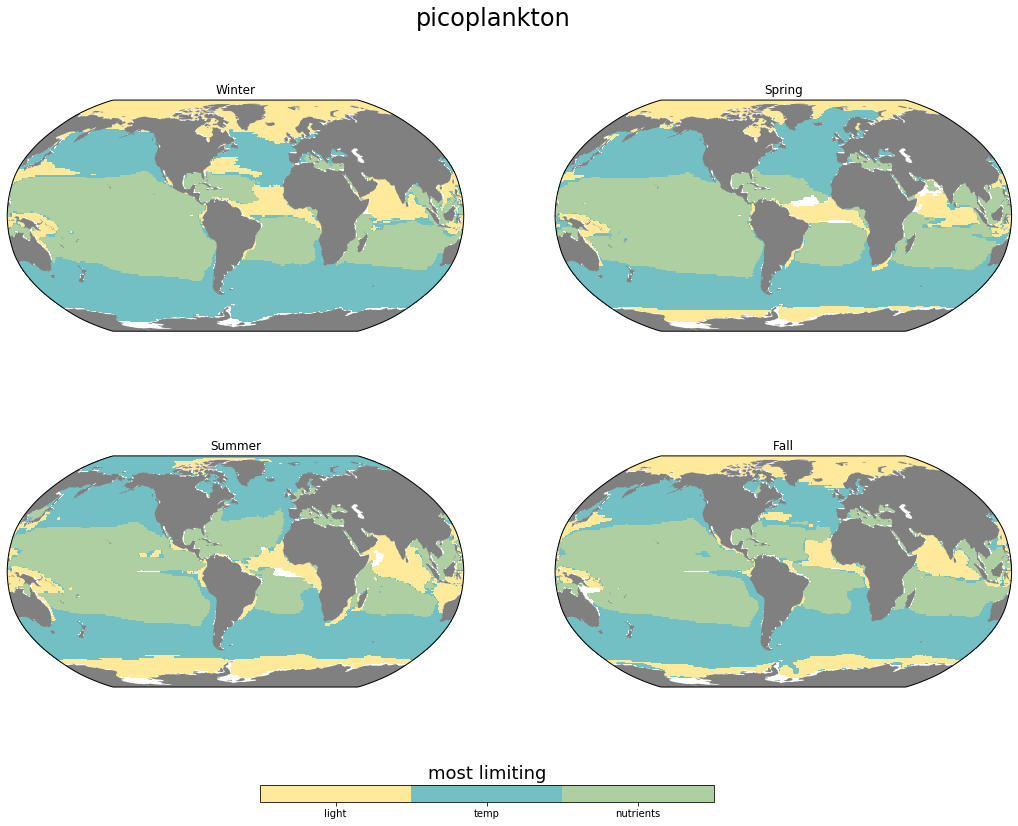

In [30]:
# levels
levels = [0, 0.9, 1.9,  2.9]

# figure 
fig = plt.figure(figsize=(18, 12))
lat = ds.lat

# Winter 
ax = fig.add_subplot(2, 2, 1, projection=ccrs.Robinson(central_longitude=305.0))
jan, lon = add_cyclic_point(np.nanmean(pp_index[list(range(2)) + [-1]], axis=0), coord=ds.lon, axis=1)
cf = ax.pcolor(lon, lat, jan, cmap=cm, vmin =0, vmax =3, transform=ccrs.PlateCarree())
land = ax.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax.set_title('Winter')

# Spring 
ax1 = fig.add_subplot(2, 2, 2 , projection=ccrs.Robinson(central_longitude=305.0))
apr, lon = add_cyclic_point(np.nanmean(pp_index[2:5,:,:], axis=0), coord=ds.lon, axis=1)
cf = ax1.pcolor(lon, lat, apr, cmap=cm, vmin =0, vmax =3, transform=ccrs.PlateCarree())
land = ax1.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax1.set_title('Spring')

# Summer 
ax2 = fig.add_subplot(2, 2, 3, projection=ccrs.Robinson(central_longitude=305.0))
aug, lon = add_cyclic_point(np.nanmean(pp_index[5:8,:,:], axis=0), coord=ds.lon, axis=1)
cf = ax2.pcolor(lon, lat, aug, cmap=cm, vmin =0, vmax =3, transform=ccrs.PlateCarree())
land = ax2.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax2.set_title('Summer')

# Fall 
ax2 = fig.add_subplot(2, 2, 4, projection=ccrs.Robinson(central_longitude=305.0))
aug, lon = add_cyclic_point(np.nanmean(pp_index[8:11,:,:], axis=0), coord=ds.lon, axis=1)
cf = ax2.pcolor(lon, lat, aug, cmap=cm, vmin =0, vmax =3, transform=ccrs.PlateCarree())
land = ax2.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax2.set_title('Fall')

# colorbar and labels
cbar_ax = fig.add_axes([0.32, 0.03, 0.35, 0.02])
cbar = fig.colorbar(cf, cax=cbar_ax, shrink=0.5, spacing='uniform',ticks=[0.5,1.5,2.5,3.5],orientation="horizontal")
cbar.ax.set_xticklabels(['light','temp', 'nutrients'])
cbar.ax.set_title('most limiting', fontsize = 18)
fig.suptitle('picoplankton', x=0.5, y=.95,fontsize=24)

fig.savefig('surf_lim_pp.png')

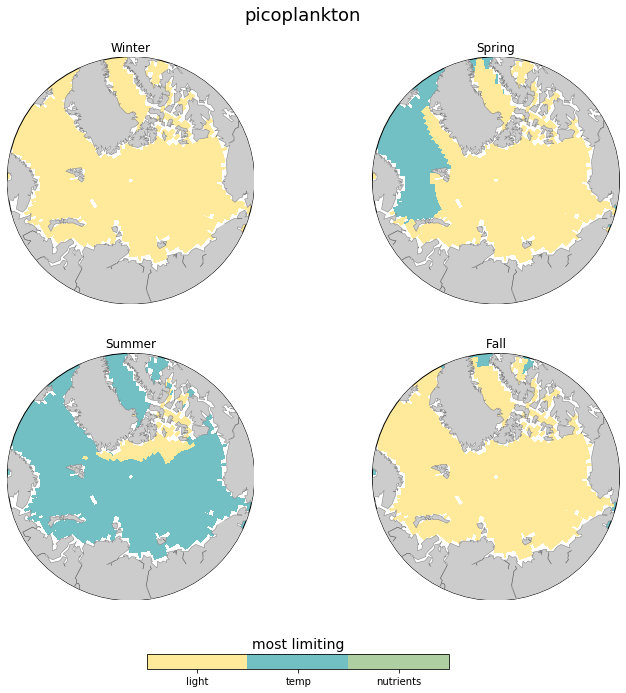

In [31]:
fig = plt.figure(figsize=(12,10))
x, y = m(*np.meshgrid(ds.lon,ds.lat))

# Winter
ax = fig.add_subplot(221) 
ax.set_title("Winter")
m.pcolormesh(x,y,np.nanmean(pp_index[list(range(2)) + [-1]], axis=0),shading='flat',cmap=cm, vmin =0, vmax =3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


# Spring
ax = fig.add_subplot(222) 
ax.set_title("Spring")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.pcolormesh(x,y,np.nanmean(pp_index[2:5,:,:], axis=0),shading='flat',cmap=cm,vmin =0, vmax =3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


# Summer
ax = fig.add_subplot(223) 
ax.set_title("Summer")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
im = m.pcolormesh(x,y,np.nanmean(pp_index[5:8,:,:], axis=0),shading='flat',cmap=cm,vmin =0, vmax =3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)

# Fall
ax = fig.add_subplot(224) 
ax.set_title("Fall")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
im = m.pcolormesh(x,y,np.nanmean(pp_index[8:11,:,:], axis=0),shading='flat',cmap=cm,vmin =0, vmax =3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


fig.suptitle('picoplankton', x=0.5, y=.95,fontsize=18)
cbar_ax = fig.add_axes([0.32, 0.03, 0.35, 0.02])
cbar = fig.colorbar(cf, cax=cbar_ax, shrink=0.5, spacing='uniform',ticks=[0.5,1.5,2.5,3.5],orientation="horizontal")
cbar.ax.set_xticklabels(['light','temp', 'nutrients'])
cbar.ax.set_title('most limiting', fontsize = 14)
m.plot
plt.show()
fig.savefig('surf_lim_pp_ao.png')

## diatom 1

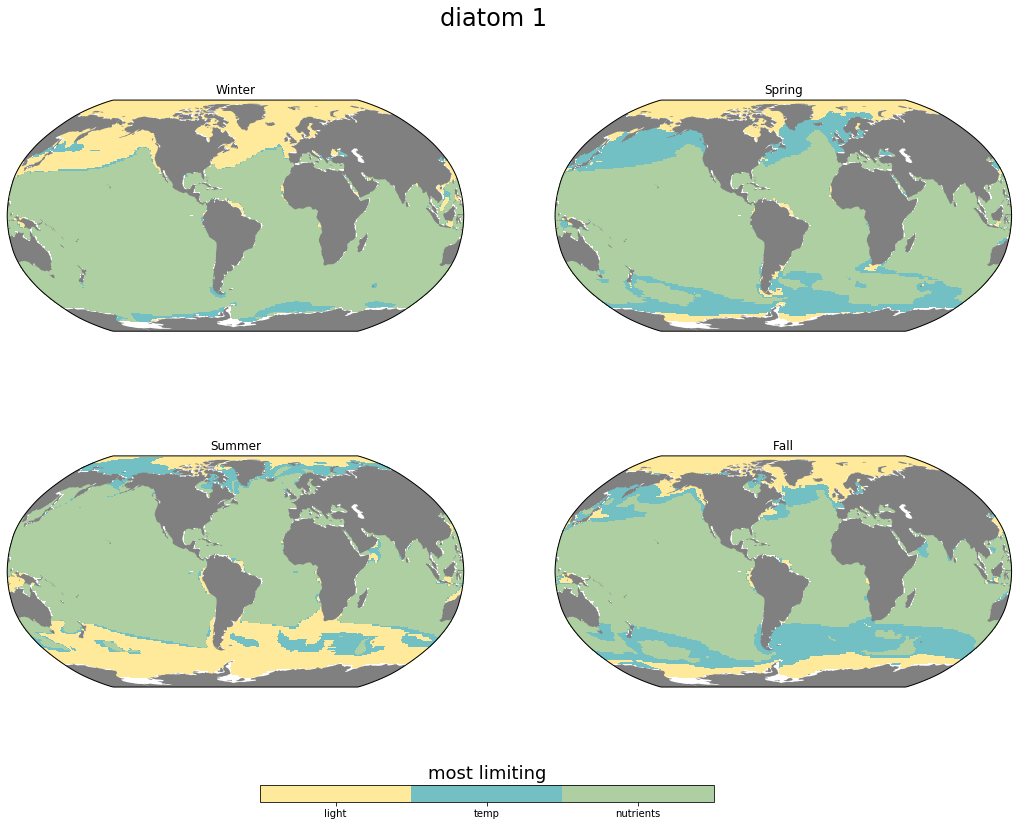

In [34]:
# levels
levels = [0, 0.9, 1.9,  2.9]

# figure 
fig = plt.figure(figsize=(18, 12))
lat = ds.lat

# Winter 
ax = fig.add_subplot(2, 2, 1, projection=ccrs.Robinson(central_longitude=305.0))
jan, lon = add_cyclic_point(np.nanmean(diat1_index[list(range(2)) + [-1]], axis=0), coord=ds.lon, axis=1)
cf = ax.pcolor(lon, lat, jan, cmap=cm, vmin =0, vmax =3, transform=ccrs.PlateCarree())
land = ax.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax.set_title('Winter')

# Spring 
ax1 = fig.add_subplot(2, 2, 2 , projection=ccrs.Robinson(central_longitude=305.0))
apr, lon = add_cyclic_point(np.nanmean(diat1_index[2:5,:,:], axis=0), coord=ds.lon, axis=1)
cf = ax1.pcolor(lon, lat, apr, cmap=cm, vmin =0, vmax =3, transform=ccrs.PlateCarree())
land = ax1.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax1.set_title('Spring')

# Summer 
ax2 = fig.add_subplot(2, 2, 3, projection=ccrs.Robinson(central_longitude=305.0))
aug, lon = add_cyclic_point(np.nanmean(diat1_index[5:8,:,:], axis=0), coord=ds.lon, axis=1)
cf = ax2.pcolor(lon, lat, aug, cmap=cm, vmin =0, vmax =3, transform=ccrs.PlateCarree())
land = ax2.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax2.set_title('Summer')

# Fall 
ax2 = fig.add_subplot(2, 2, 4, projection=ccrs.Robinson(central_longitude=305.0))
aug, lon = add_cyclic_point(np.nanmean(diat1_index[8:11,:,:], axis=0), coord=ds.lon, axis=1)
cf = ax2.pcolor(lon, lat, aug, cmap=cm, vmin =0, vmax =3, transform=ccrs.PlateCarree())
land = ax2.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax2.set_title('Fall')

# colorbar and labels
cbar_ax = fig.add_axes([0.32, 0.03, 0.35, 0.02])
cbar = fig.colorbar(cf, cax=cbar_ax, shrink=0.5, spacing='uniform',ticks=[0.5,1.5,2.5],orientation="horizontal")
cbar.ax.set_xticklabels(['light','temp', 'nutrients'])
cbar.ax.set_title('most limiting', fontsize = 18)
fig.suptitle('diatom 1', x=0.5, y=.95,fontsize=24)

fig.savefig('surf_lim_diat1.png')

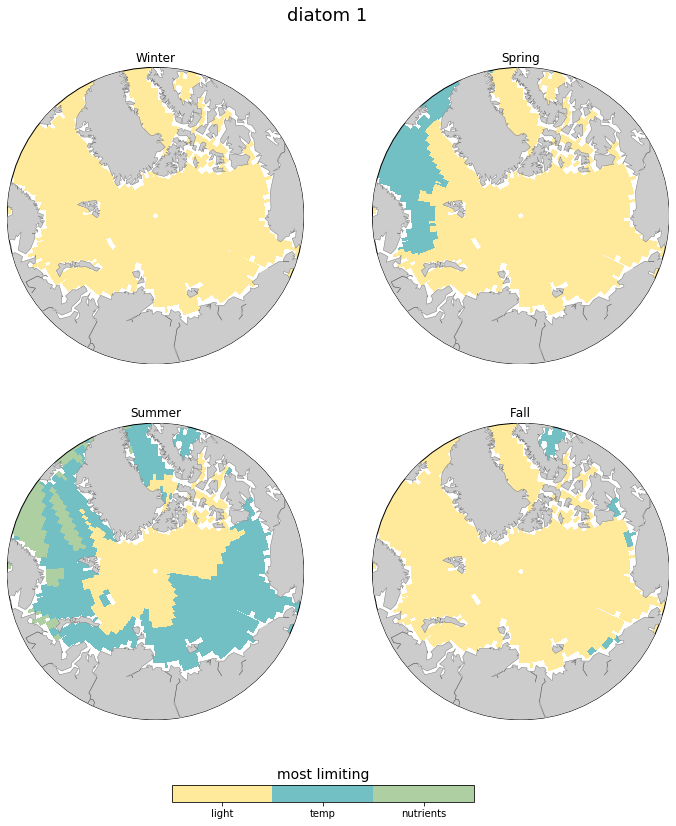

In [37]:
fig = plt.figure(figsize=(12,12))
x, y = m(*np.meshgrid(ds.lon,ds.lat))

# Winter
ax = fig.add_subplot(221) 
ax.set_title("Winter")
m.pcolormesh(x,y,np.nanmean(diat1_index[list(range(2)) + [-1]], axis=0),shading='flat',cmap=cm, vmin =0, vmax =3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


# Spring
ax = fig.add_subplot(222) 
ax.set_title("Spring")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.pcolormesh(x,y,np.nanmean(diat1_index[2:5,:,:], axis=0),shading='flat',cmap=cm,vmin =0, vmax =3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


# Summer
ax = fig.add_subplot(223) 
ax.set_title("Summer")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
im = m.pcolormesh(x,y,np.nanmean(diat1_index[5:8,:,:], axis=0),shading='flat',cmap=cm,vmin =0, vmax =3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)

# Fall
ax = fig.add_subplot(224) 
ax.set_title("Fall")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
im = m.pcolormesh(x,y,np.nanmean(diat1_index[8:11,:,:], axis=0),shading='flat',cmap=cm,vmin =0, vmax =3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)

fig.suptitle('diatom 1', x=0.5, y=.95,fontsize=18)
cbar_ax = fig.add_axes([0.32, 0.03, 0.35, 0.02])
cbar = fig.colorbar(cf, cax=cbar_ax, shrink=0.5, spacing='uniform',ticks=[0.5,1.5,2.5,3.5],orientation="horizontal")
cbar.ax.set_xticklabels(['light','temp', 'nutrients'])
cbar.ax.set_title('most limiting', fontsize = 14)
m.plot
plt.show()

fig.savefig('surf_lim_diat1_ao.png')

## diatom 2

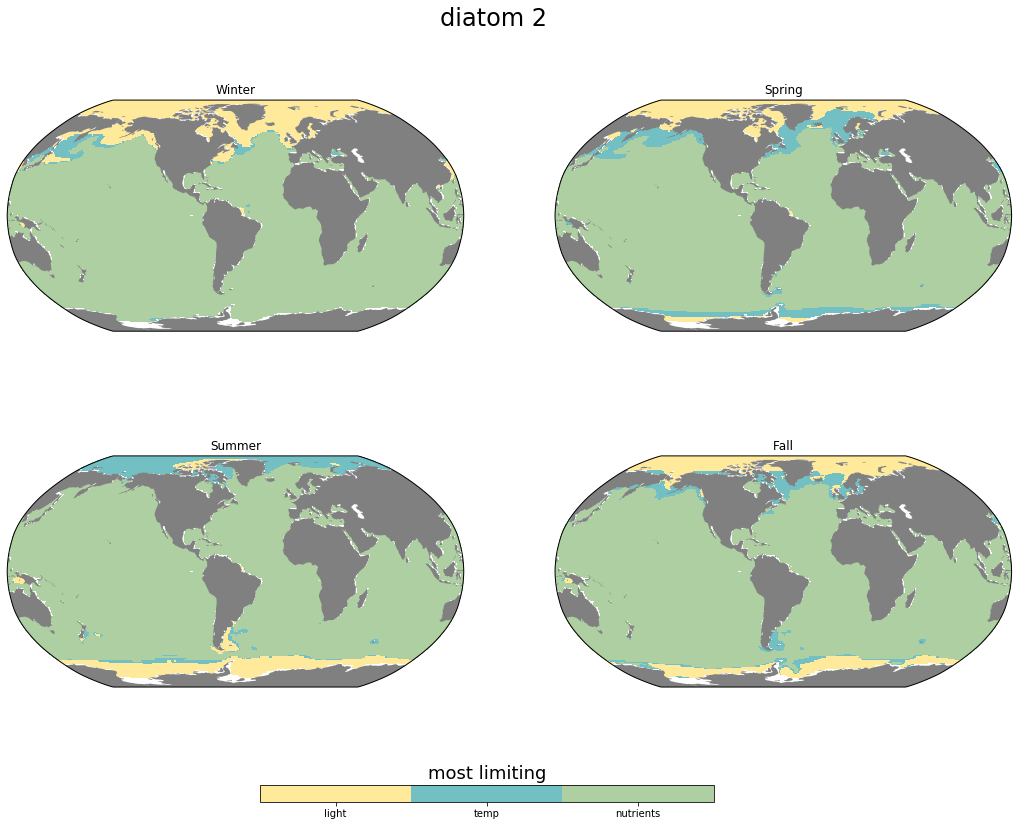

In [36]:
# levels
levels = [0, 0.9, 1.9,  2.9]

# figure 
fig = plt.figure(figsize=(18, 12))
lat = ds.lat

# Winter 
ax = fig.add_subplot(2, 2, 1, projection=ccrs.Robinson(central_longitude=305.0))
jan, lon = add_cyclic_point(np.nanmean(diat2_index[list(range(2)) + [-1]], axis=0), coord=ds.lon, axis=1)
cf = ax.pcolor(lon, lat, jan, cmap=cm, vmin =0, vmax =3, transform=ccrs.PlateCarree())
land = ax.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax.set_title('Winter')

# Spring 
ax1 = fig.add_subplot(2, 2, 2 , projection=ccrs.Robinson(central_longitude=305.0))
apr, lon = add_cyclic_point(np.nanmean(diat2_index[2:5,:,:], axis=0), coord=ds.lon, axis=1)
cf = ax1.pcolor(lon, lat, apr, cmap=cm, vmin =0, vmax =3, transform=ccrs.PlateCarree())
land = ax1.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax1.set_title('Spring')

# Summer 
ax2 = fig.add_subplot(2, 2, 3, projection=ccrs.Robinson(central_longitude=305.0))
aug, lon = add_cyclic_point(np.nanmean(diat2_index[5:8,:,:], axis=0), coord=ds.lon, axis=1)
cf = ax2.pcolor(lon, lat, aug, cmap=cm, vmin =0, vmax =3, transform=ccrs.PlateCarree())
land = ax2.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax2.set_title('Summer')

# Fall 
ax2 = fig.add_subplot(2, 2, 4, projection=ccrs.Robinson(central_longitude=305.0))
aug, lon = add_cyclic_point(np.nanmean(diat2_index[8:11,:,:], axis=0), coord=ds.lon, axis=1)
cf = ax2.pcolor(lon, lat, aug, cmap=cm, vmin =0, vmax =3, transform=ccrs.PlateCarree())
land = ax2.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax2.set_title('Fall')

# colorbar and labels
cbar_ax = fig.add_axes([0.32, 0.03, 0.35, 0.02])
cbar = fig.colorbar(cf, cax=cbar_ax, shrink=0.5, spacing='uniform',ticks=[0.5,1.5,2.5,3.5],orientation="horizontal")
cbar.ax.set_xticklabels(['light','temp', 'nutrients'])
cbar.ax.set_title('most limiting', fontsize = 18)
fig.suptitle('diatom 2', x=0.5, y=.95,fontsize=24)

fig.savefig('surf_lim_diat2.png')

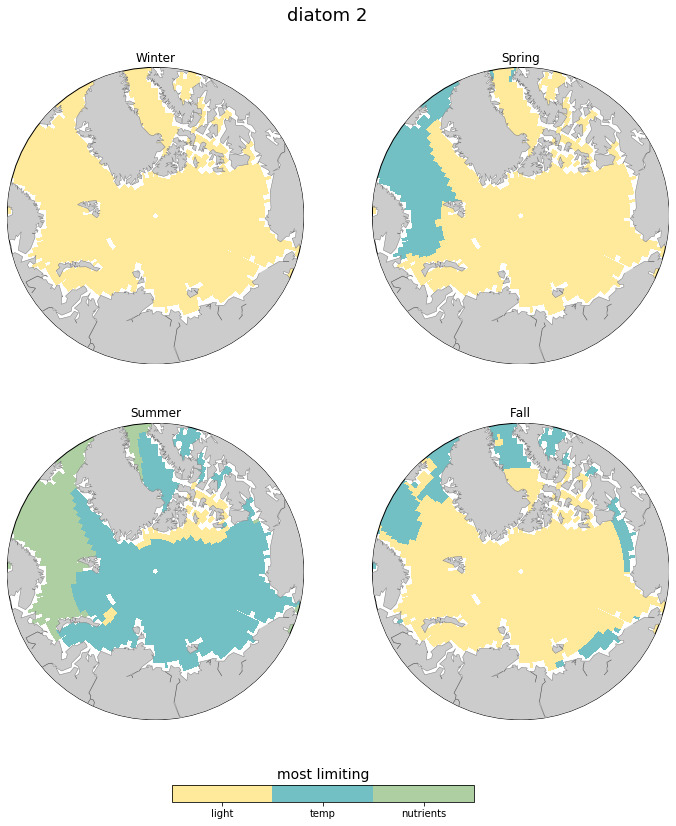

In [39]:
fig = plt.figure(figsize=(12,12))
x, y = m(*np.meshgrid(ds.lon,ds.lat))

# Winter
ax = fig.add_subplot(221) 
ax.set_title("Winter")
m.pcolormesh(x,y,np.nanmean(diat2_index[list(range(2)) + [-1]], axis=0),shading='flat',cmap=cm, vmin =0, vmax =3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


# Spring
ax = fig.add_subplot(222) 
ax.set_title("Spring")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.pcolormesh(x,y,np.nanmean(diat2_index[2:5,:,:], axis=0),shading='flat',cmap=cm,vmin =0, vmax =3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


# Summer
ax = fig.add_subplot(223) 
ax.set_title("Summer")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
im = m.pcolormesh(x,y,np.nanmean(diat2_index[5:8,:,:], axis=0),shading='flat',cmap=cm,vmin =0, vmax =3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)

# Fall
ax = fig.add_subplot(224) 
ax.set_title("Fall")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
im = m.pcolormesh(x,y,np.nanmean(diat2_index[8:11,:,:], axis=0),shading='flat',cmap=cm,vmin =0, vmax =3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)

fig.suptitle('diatom 2', x=0.5, y=.95,fontsize=18)
cbar_ax = fig.add_axes([0.32, 0.03, 0.35, 0.02])
cbar = fig.colorbar(cf, cax=cbar_ax, shrink=0.5, spacing='uniform',ticks=[0.5,1.5,2.5,3.5],orientation="horizontal")
cbar.ax.set_xticklabels(['light','temp', 'nutrients'])
cbar.ax.set_title('most limiting', fontsize = 14)
m.plot
plt.show()


fig.savefig('surf_lim_diat2_ao.png')

## diatom 3

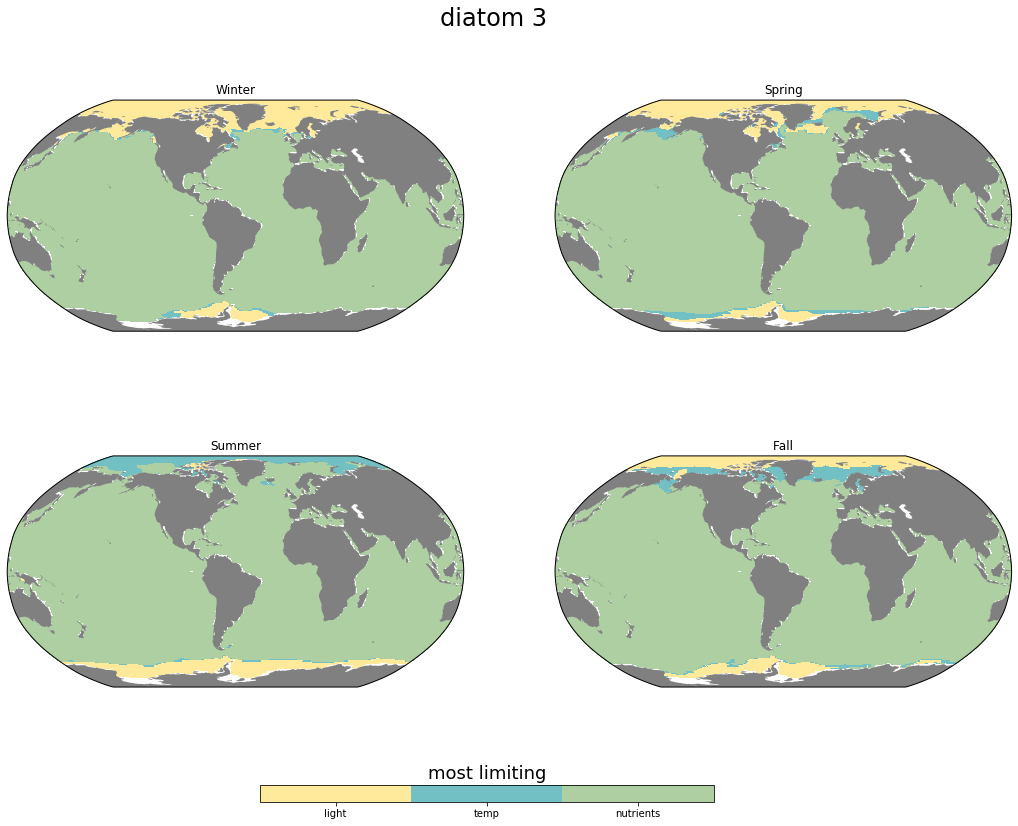

In [40]:
# levels
levels = [0, 0.9, 1.9,  2.9]

# figure 
fig = plt.figure(figsize=(18, 12))
lat = ds.lat

# Winter 
ax = fig.add_subplot(2, 2, 1, projection=ccrs.Robinson(central_longitude=305.0))
winter, lon = add_cyclic_point(np.nanmean(diat3_index[list(range(2)) + [-1]], axis=0), coord=ds.lon, axis=1)
cf = ax.pcolor(lon, lat, winter, cmap=cm,vmin =0, vmax =3, transform=ccrs.PlateCarree())
land = ax.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax.set_title('Winter')

# Spring 
ax1 = fig.add_subplot(2, 2, 2 , projection=ccrs.Robinson(central_longitude=305.0))
spring, lon = add_cyclic_point(np.nanmean(diat3_index[2:5,:,:], axis=0), coord=ds.lon, axis=1)
cf = ax1.pcolor(lon, lat, spring, cmap=cm, vmin =0, vmax =3,transform=ccrs.PlateCarree())
land = ax1.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax1.set_title('Spring')

# Summer 
ax2 = fig.add_subplot(2, 2, 3, projection=ccrs.Robinson(central_longitude=305.0))
summer, lon = add_cyclic_point(np.nanmean(diat3_index[5:8,:,:], axis=0), coord=ds.lon, axis=1)
cf = ax2.pcolor(lon, lat, summer, cmap=cm,vmin =0, vmax =3, transform=ccrs.PlateCarree())
land = ax2.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax2.set_title('Summer')

# Fall 
ax2 = fig.add_subplot(2, 2, 4, projection=ccrs.Robinson(central_longitude=305.0))
fall, lon = add_cyclic_point(np.nanmean(diat3_index[8:11,:,:], axis=0), coord=ds.lon, axis=1)
cf = ax2.pcolor(lon, lat, fall, cmap=cm, vmin =0, vmax =3, transform=ccrs.PlateCarree())
land = ax2.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax2.set_title('Fall')

# colorbar and labels
cbar_ax = fig.add_axes([0.32, 0.03, 0.35, 0.02])
cbar = fig.colorbar(cf, cax=cbar_ax, shrink=0.5, spacing='uniform',ticks=[0.5,1.5,2.5,3.5],orientation="horizontal")
cbar.ax.set_xticklabels(['light','temp', 'nutrients'])
cbar.ax.set_title('most limiting', fontsize = 18)
fig.suptitle('diatom 3', x=0.5, y=.95,fontsize=24)

fig.savefig('surf_lim_diat3.png')

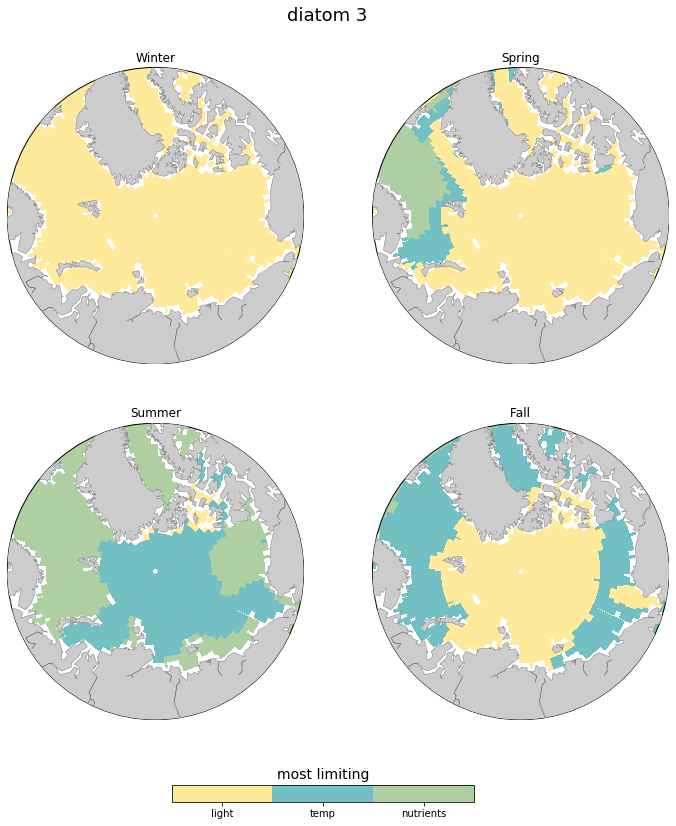

In [41]:
fig = plt.figure(figsize=(12,12))
x, y = m(*np.meshgrid(ds.lon,ds.lat))

# Winter
ax = fig.add_subplot(221) 
ax.set_title("Winter")
m.pcolormesh(x,y,np.nanmean(diat3_index[list(range(2)) + [-1]], axis=0),shading='flat',cmap=cm, vmin =0, vmax =3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


# Spring
ax = fig.add_subplot(222) 
ax.set_title("Spring")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.pcolormesh(x,y,np.nanmean(diat3_index[2:5,:,:], axis=0),shading='flat',cmap=cm,vmin =0, vmax =3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


# Summer
ax = fig.add_subplot(223) 
ax.set_title("Summer")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
im = m.pcolormesh(x,y,np.nanmean(diat3_index[5:8,:,:], axis=0),shading='flat',cmap=cm,vmin =0, vmax =3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)

# Fall
ax = fig.add_subplot(224) 
ax.set_title("Fall")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
im = m.pcolormesh(x,y,np.nanmean(diat3_index[8:11,:,:], axis=0),shading='flat',cmap=cm,vmin =0, vmax =3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


fig.suptitle('diatom 3', x=0.5, y=.95,fontsize=18)
cbar_ax = fig.add_axes([0.32, 0.03, 0.35, 0.02])
cbar = fig.colorbar(cf, cax=cbar_ax, shrink=0.5, spacing='uniform',ticks=[0.5,1.5,2.5,3.5],orientation="horizontal")
cbar.ax.set_xticklabels(['light','temp', 'nutrients'])
cbar.ax.set_title('most limiting', fontsize = 14)
m.plot
plt.show()

fig.savefig('surf_lim_diat3_ao.png')

## Mixed phytoplankton 1

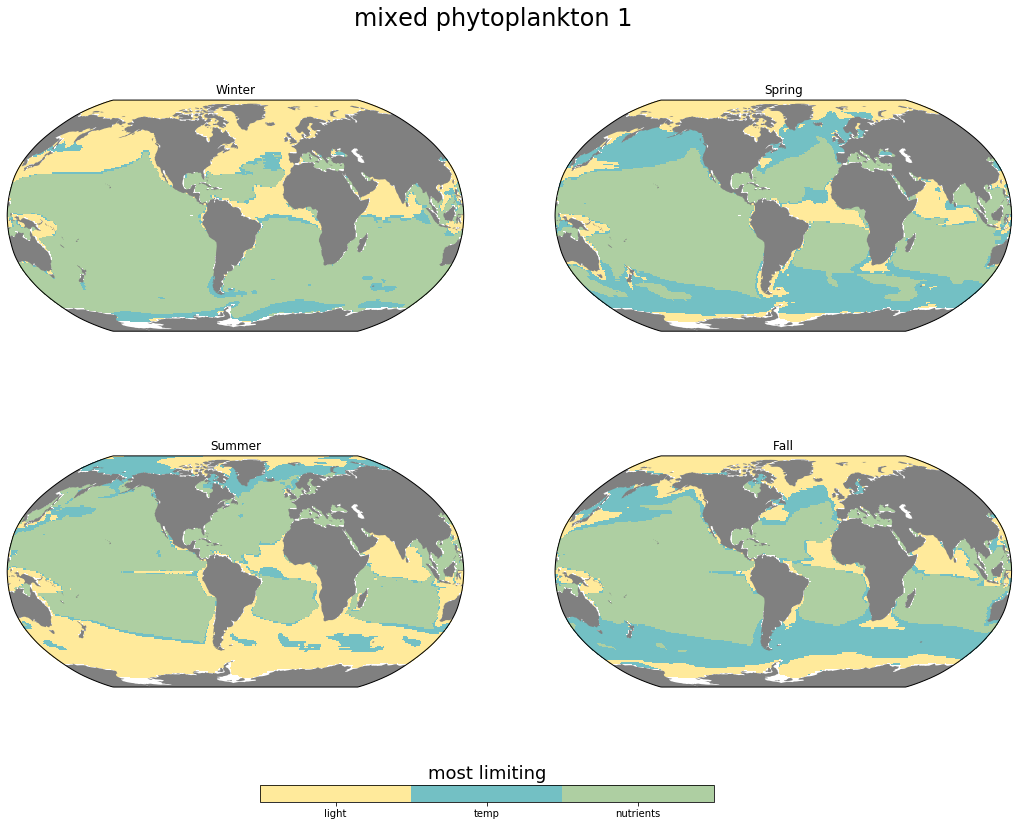

In [42]:
# levels
levels = [0, 0.9, 1.9,  2.9]

# figure 
fig = plt.figure(figsize=(18, 12))
lat = ds.lat

# Winter 
ax = fig.add_subplot(2, 2, 1, projection=ccrs.Robinson(central_longitude=305.0))
winter, lon = add_cyclic_point(np.nanmean(mp1_index[list(range(2)) + [-1]], axis=0), coord=ds.lon, axis=1)
cf = ax.pcolor(lon, lat, winter, cmap=cm,vmin =0, vmax =3, transform=ccrs.PlateCarree())
land = ax.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax.set_title('Winter')

# Spring 
ax1 = fig.add_subplot(2, 2, 2 , projection=ccrs.Robinson(central_longitude=305.0))
spring, lon = add_cyclic_point(np.nanmean(mp1_index[2:5,:,:], axis=0), coord=ds.lon, axis=1)
cf = ax1.pcolor(lon, lat, spring, cmap=cm, vmin =0, vmax =3,transform=ccrs.PlateCarree())
land = ax1.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax1.set_title('Spring')

# Summer 
ax2 = fig.add_subplot(2, 2, 3, projection=ccrs.Robinson(central_longitude=305.0))
summer, lon = add_cyclic_point(np.nanmean(mp1_index[5:8,:,:], axis=0), coord=ds.lon, axis=1)
cf = ax2.pcolor(lon, lat, summer, cmap=cm,vmin =0, vmax =3, transform=ccrs.PlateCarree())
land = ax2.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax2.set_title('Summer')

# Fall 
ax2 = fig.add_subplot(2, 2, 4, projection=ccrs.Robinson(central_longitude=305.0))
fall, lon = add_cyclic_point(np.nanmean(mp1_index[8:11,:,:], axis=0), coord=ds.lon, axis=1)
cf = ax2.pcolor(lon, lat, fall, cmap=cm, vmin =0, vmax =3, transform=ccrs.PlateCarree())
land = ax2.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax2.set_title('Fall')

# colorbar and labels
cbar_ax = fig.add_axes([0.32, 0.03, 0.35, 0.02])
cbar = fig.colorbar(cf, cax=cbar_ax, shrink=0.5, spacing='uniform',ticks=[0.5,1.5,2.5,3.5],orientation="horizontal")
cbar.ax.set_xticklabels(['light','temp', 'nutrients'])
cbar.ax.set_title('most limiting', fontsize = 18)
fig.suptitle('mixed phytoplankton 1', x=0.5, y=.95,fontsize=24)

fig.savefig('surf_lim_mp1.png')

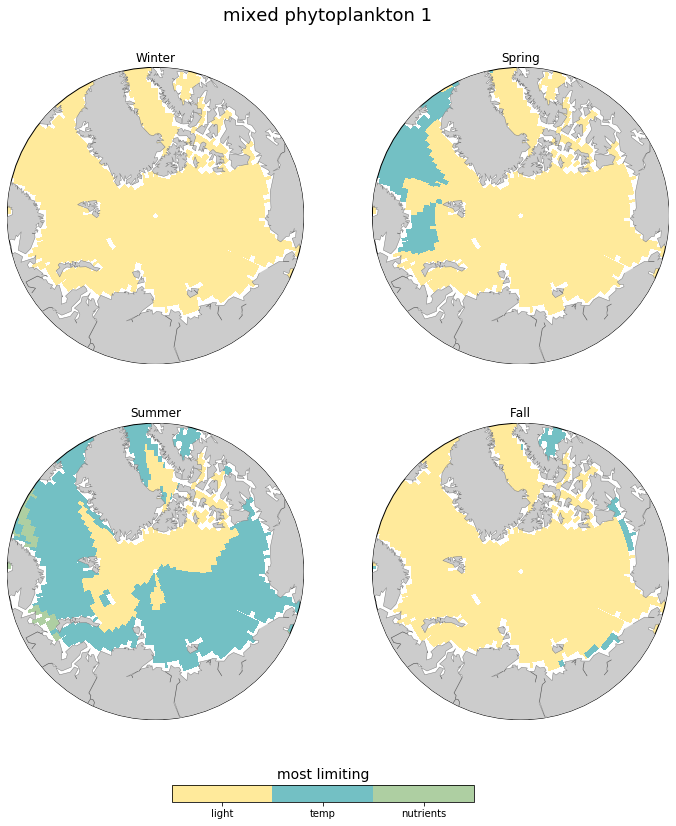

In [43]:
fig = plt.figure(figsize=(12,12))
x, y = m(*np.meshgrid(ds.lon,ds.lat))

# Winter
ax = fig.add_subplot(221) 
ax.set_title("Winter")
m.pcolormesh(x,y,np.nanmean(mp1_index[list(range(2)) + [-1]], axis=0),shading='flat',cmap=cm, vmin =0, vmax =3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


# Spring
ax = fig.add_subplot(222) 
ax.set_title("Spring")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.pcolormesh(x,y,np.nanmean(mp1_index[2:5,:,:], axis=0),shading='flat',cmap=cm,vmin =0, vmax =3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


# Summer
ax = fig.add_subplot(223) 
ax.set_title("Summer")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
im = m.pcolormesh(x,y,np.nanmean(mp1_index[5:8,:,:], axis=0),shading='flat',cmap=cm,vmin =0, vmax =3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)

# Fall
ax = fig.add_subplot(224) 
ax.set_title("Fall")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
im = m.pcolormesh(x,y,np.nanmean(mp1_index[8:11,:,:], axis=0),shading='flat',cmap=cm,vmin =0, vmax =3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


fig.suptitle('mixed phytoplankton 1', x=0.5, y=.95,fontsize=18)
cbar_ax = fig.add_axes([0.32, 0.03, 0.35, 0.02])
cbar = fig.colorbar(cf, cax=cbar_ax, shrink=0.5, spacing='uniform',ticks=[0.5,1.5,2.5,3.5],orientation="horizontal")
cbar.ax.set_xticklabels(['light','temp', 'nutrients'])
cbar.ax.set_title('most limiting', fontsize = 14)
m.plot
plt.show()

fig.savefig('surf_lim_mp1_ao.png')

## Mixed phytoplankton 2

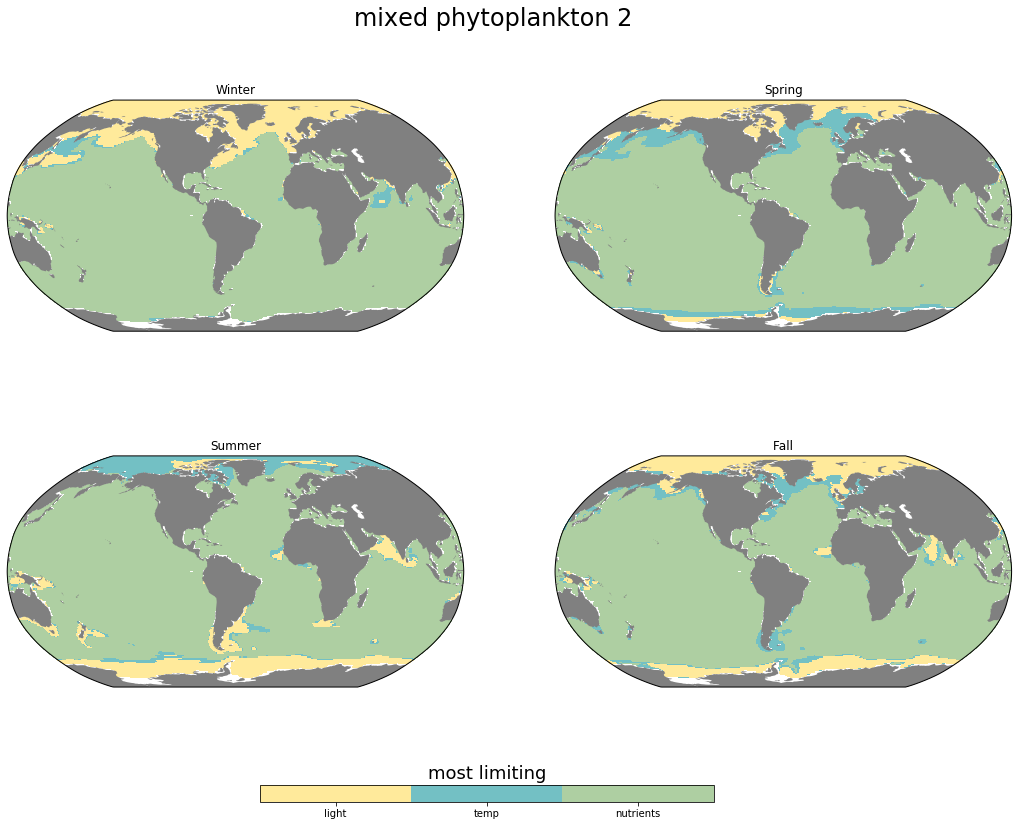

In [44]:
# levels
levels = [0, 0.9, 1.9,  2.9]

# figure 
fig = plt.figure(figsize=(18, 12))
lat = ds.lat

# Winter 
ax = fig.add_subplot(2, 2, 1, projection=ccrs.Robinson(central_longitude=305.0))
winter, lon = add_cyclic_point(np.nanmean(mp2_index[list(range(2)) + [-1]], axis=0), coord=ds.lon, axis=1)
cf = ax.pcolor(lon, lat, winter, cmap=cm,vmin =0, vmax =3, transform=ccrs.PlateCarree())
land = ax.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax.set_title('Winter')

# Spring 
ax1 = fig.add_subplot(2, 2, 2 , projection=ccrs.Robinson(central_longitude=305.0))
spring, lon = add_cyclic_point(np.nanmean(mp2_index[2:5,:,:], axis=0), coord=ds.lon, axis=1)
cf = ax1.pcolor(lon, lat, spring, cmap=cm, vmin =0, vmax =3,transform=ccrs.PlateCarree())
land = ax1.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax1.set_title('Spring')

# Summer 
ax2 = fig.add_subplot(2, 2, 3, projection=ccrs.Robinson(central_longitude=305.0))
summer, lon = add_cyclic_point(np.nanmean(mp2_index[5:8,:,:], axis=0), coord=ds.lon, axis=1)
cf = ax2.pcolor(lon, lat, summer, cmap=cm,vmin =0, vmax =3, transform=ccrs.PlateCarree())
land = ax2.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax2.set_title('Summer')

# Fall 
ax2 = fig.add_subplot(2, 2, 4, projection=ccrs.Robinson(central_longitude=305.0))
fall, lon = add_cyclic_point(np.nanmean(mp2_index[8:11,:,:], axis=0), coord=ds.lon, axis=1)
cf = ax2.pcolor(lon, lat, fall, cmap=cm, vmin =0, vmax =3, transform=ccrs.PlateCarree())
land = ax2.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax2.set_title('Fall')

# colorbar and labels
cbar_ax = fig.add_axes([0.32, 0.03, 0.35, 0.02])
cbar = fig.colorbar(cf, cax=cbar_ax, shrink=0.5, spacing='uniform',ticks=[0.5,1.5,2.5],orientation="horizontal")
cbar.ax.set_xticklabels(['light','temp', 'nutrients'])
cbar.ax.set_title('most limiting', fontsize = 18)
fig.suptitle('mixed phytoplankton 2', x=0.5, y=.95,fontsize=24)

fig.savefig('surf_lim_mp2.png')

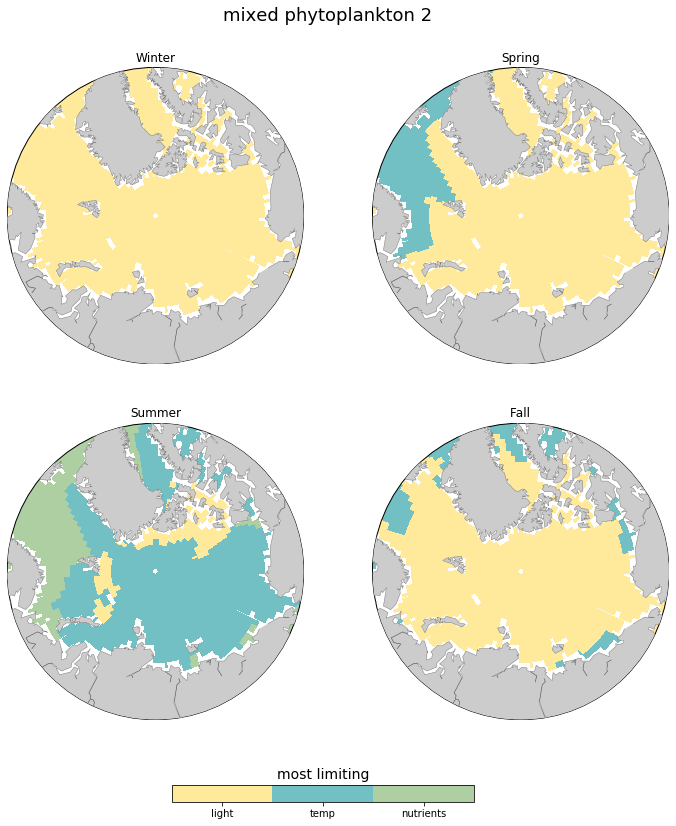

In [45]:
fig = plt.figure(figsize=(12,12))
x, y = m(*np.meshgrid(ds.lon,ds.lat))

# Winter
ax = fig.add_subplot(221) 
ax.set_title("Winter")
m.pcolormesh(x,y,np.nanmean(mp2_index[list(range(2)) + [-1]], axis=0),shading='flat',cmap=cm, vmin =0, vmax =3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


# Spring
ax = fig.add_subplot(222) 
ax.set_title("Spring")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.pcolormesh(x,y,np.nanmean(mp2_index[2:5,:,:], axis=0),shading='flat',cmap=cm,vmin =0, vmax =3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


# Summer
ax = fig.add_subplot(223) 
ax.set_title("Summer")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
im = m.pcolormesh(x,y,np.nanmean(mp2_index[5:8,:,:], axis=0),shading='flat',cmap=cm,vmin =0, vmax =3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)

# Fall
ax = fig.add_subplot(224) 
ax.set_title("Fall")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
im = m.pcolormesh(x,y,np.nanmean(mp2_index[8:11,:,:], axis=0),shading='flat',cmap=cm,vmin =0, vmax =3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


fig.suptitle('mixed phytoplankton 2', x=0.5, y=.95,fontsize=18)
cbar_ax = fig.add_axes([0.32, 0.03, 0.35, 0.02])
cbar = fig.colorbar(cf, cax=cbar_ax, shrink=0.5, spacing='uniform',ticks=[0.5,1.5,2.5,3.5],orientation="horizontal")
cbar.ax.set_xticklabels(['light','temp', 'nutrients'])
cbar.ax.set_title('most limiting', fontsize = 14)
m.plot
plt.show()

fig.savefig('surf_lim_mp2_ao.png')

## Mixed phytoplankton 3

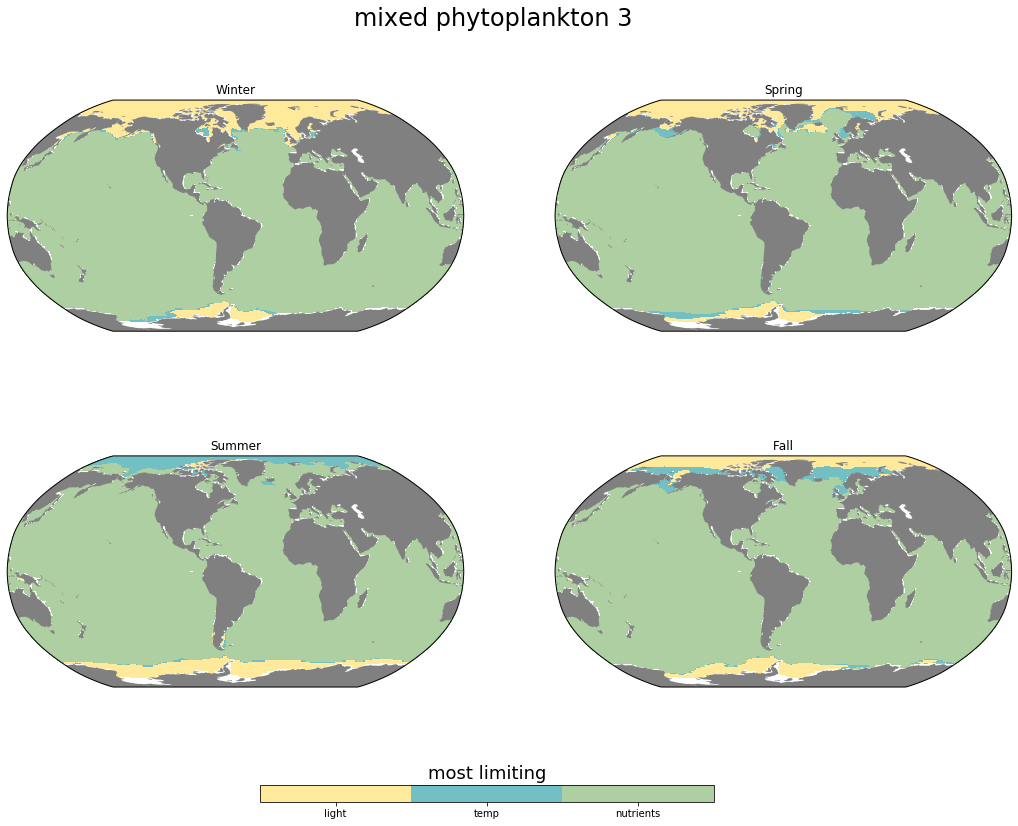

In [47]:
# levels
levels = [0, 0.9, 1.9,  2.9]

# figure 
fig = plt.figure(figsize=(18, 12))
lat = ds.lat

# Winter 
ax = fig.add_subplot(2, 2, 1, projection=ccrs.Robinson(central_longitude=305.0))
winter, lon = add_cyclic_point(np.nanmean(mp3_index[list(range(2)) + [-1]], axis=0), coord=ds.lon, axis=1)
cf = ax.pcolor(lon, lat, winter, cmap=cm,vmin =0, vmax =3, transform=ccrs.PlateCarree())
land = ax.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax.set_title('Winter')

# Spring 
ax1 = fig.add_subplot(2, 2, 2 , projection=ccrs.Robinson(central_longitude=305.0))
spring, lon = add_cyclic_point(np.nanmean(mp3_index[2:5,:,:], axis=0), coord=ds.lon, axis=1)
cf = ax1.pcolor(lon, lat, spring, cmap=cm, vmin =0, vmax =3,transform=ccrs.PlateCarree())
land = ax1.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax1.set_title('Spring')

# Summer 
ax2 = fig.add_subplot(2, 2, 3, projection=ccrs.Robinson(central_longitude=305.0))
summer, lon = add_cyclic_point(np.nanmean(mp3_index[5:8,:,:], axis=0), coord=ds.lon, axis=1)
cf = ax2.pcolor(lon, lat, summer, cmap=cm,vmin =0, vmax =3, transform=ccrs.PlateCarree())
land = ax2.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax2.set_title('Summer')

# Fall 
ax2 = fig.add_subplot(2, 2, 4, projection=ccrs.Robinson(central_longitude=305.0))
fall, lon = add_cyclic_point(np.nanmean(mp3_index[8:11,:,:], axis=0), coord=ds.lon, axis=1)
cf = ax2.pcolor(lon, lat, fall, cmap=cm, vmin =0, vmax =3, transform=ccrs.PlateCarree())
land = ax2.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax2.set_title('Fall')

# colorbar and labels
cbar_ax = fig.add_axes([0.32, 0.03, 0.35, 0.02])
cbar = fig.colorbar(cf, cax=cbar_ax, shrink=0.5, spacing='uniform',ticks=[0.5,1.5,2.5],orientation="horizontal")
cbar.ax.set_xticklabels(['light','temp', 'nutrients'])
cbar.ax.set_title('most limiting', fontsize = 18)
fig.suptitle('mixed phytoplankton 3', x=0.5, y=.95,fontsize=24)

fig.savefig('surf_lim_mp3.png')

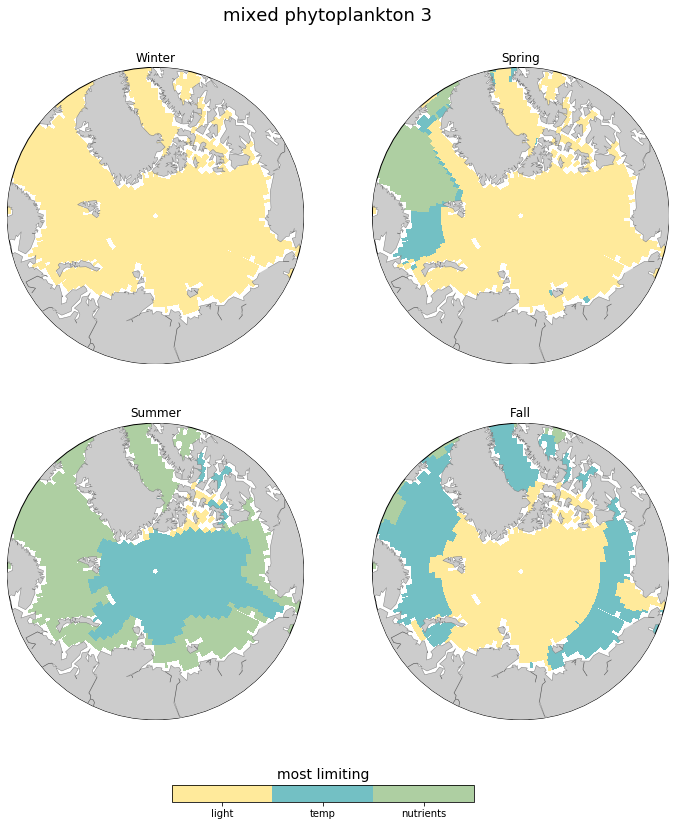

In [48]:
fig = plt.figure(figsize=(12,12))
x, y = m(*np.meshgrid(ds.lon,ds.lat))

# Winter
ax = fig.add_subplot(221) 
ax.set_title("Winter")
m.pcolormesh(x,y,np.nanmean(mp3_index[list(range(2)) + [-1]], axis=0),shading='flat',cmap=cm, vmin =0, vmax =3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


# Spring
ax = fig.add_subplot(222) 
ax.set_title("Spring")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.pcolormesh(x,y,np.nanmean(mp3_index[2:5,:,:], axis=0),shading='flat',cmap=cm,vmin =0, vmax =3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


# Summer
ax = fig.add_subplot(223) 
ax.set_title("Summer")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
im = m.pcolormesh(x,y,np.nanmean(mp3_index[5:8,:,:], axis=0),shading='flat',cmap=cm,vmin =0, vmax =3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)

# Fall
ax = fig.add_subplot(224) 
ax.set_title("Fall")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
im = m.pcolormesh(x,y,np.nanmean(mp3_index[8:11,:,:], axis=0),shading='flat',cmap=cm,vmin =0, vmax =3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


fig.suptitle('mixed phytoplankton 3', x=0.5, y=.95,fontsize=18)
cbar_ax = fig.add_axes([0.32, 0.03, 0.35, 0.02])
cbar = fig.colorbar(cf, cax=cbar_ax, shrink=0.5, spacing='uniform',ticks=[0.5,1.5,2.5,3.5],orientation="horizontal")
cbar.ax.set_xticklabels(['light','temp', 'nutrients'])
cbar.ax.set_title('most limiting', fontsize = 14)
m.plot
plt.show()

fig.savefig('surf_lim_mp3_ao.png')

## Mixed phytoplankton 4

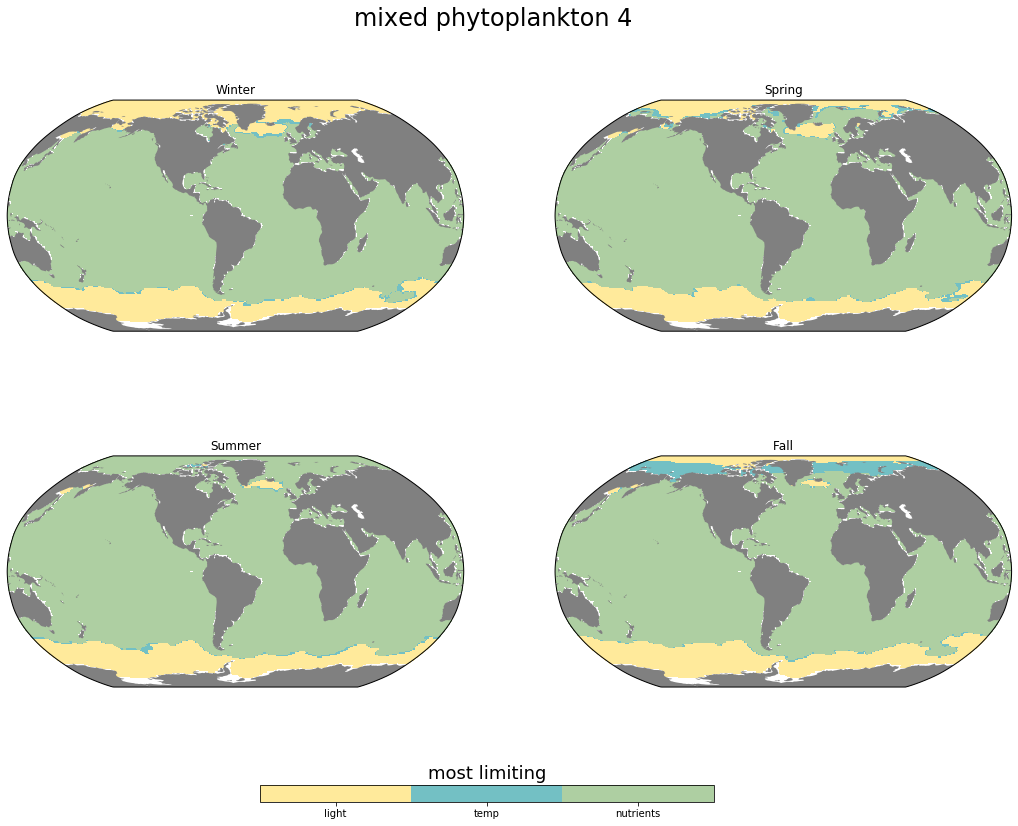

In [49]:
# levels
levels = [0, 0.9, 1.9,  2.9]

# figure 
fig = plt.figure(figsize=(18, 12))
lat = ds.lat

# Winter 
ax = fig.add_subplot(2, 2, 1, projection=ccrs.Robinson(central_longitude=305.0))
winter, lon = add_cyclic_point(np.nanmean(mp4_index[list(range(2)) + [-1]], axis=0), coord=ds.lon, axis=1)
cf = ax.pcolor(lon, lat, winter, cmap=cm,vmin =0, vmax =3, transform=ccrs.PlateCarree())
land = ax.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax.set_title('Winter')

# Spring 
ax1 = fig.add_subplot(2, 2, 2 , projection=ccrs.Robinson(central_longitude=305.0))
spring, lon = add_cyclic_point(np.nanmean(mp4_index[2:5,:,:], axis=0), coord=ds.lon, axis=1)
cf = ax1.pcolor(lon, lat, spring, cmap=cm, vmin =0, vmax =3,transform=ccrs.PlateCarree())
land = ax1.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax1.set_title('Spring')

# Summer 
ax2 = fig.add_subplot(2, 2, 3, projection=ccrs.Robinson(central_longitude=305.0))
summer, lon = add_cyclic_point(np.nanmean(mp4_index[5:8,:,:], axis=0), coord=ds.lon, axis=1)
cf = ax2.pcolor(lon, lat, summer, cmap=cm,vmin =0, vmax =3, transform=ccrs.PlateCarree())
land = ax2.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax2.set_title('Summer')

# Fall 
ax2 = fig.add_subplot(2, 2, 4, projection=ccrs.Robinson(central_longitude=305.0))
fall, lon = add_cyclic_point(np.nanmean(mp4_index[8:11,:,:], axis=0), coord=ds.lon, axis=1)
cf = ax2.pcolor(lon, lat, fall, cmap=cm, vmin =0, vmax =3, transform=ccrs.PlateCarree())
land = ax2.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax2.set_title('Fall')
# colorbar and labels
cbar_ax = fig.add_axes([0.32, 0.03, 0.35, 0.02])
cbar = fig.colorbar(cf, cax=cbar_ax, shrink=0.5, spacing='uniform',ticks=[0.5,1.5,2.5],orientation="horizontal")
cbar.ax.set_xticklabels(['light','temp', 'nutrients'])
cbar.ax.set_title('most limiting', fontsize = 18)
fig.suptitle('mixed phytoplankton 4', x=0.5, y=.95,fontsize=24)


fig.savefig('surf_lim_mp4.png')

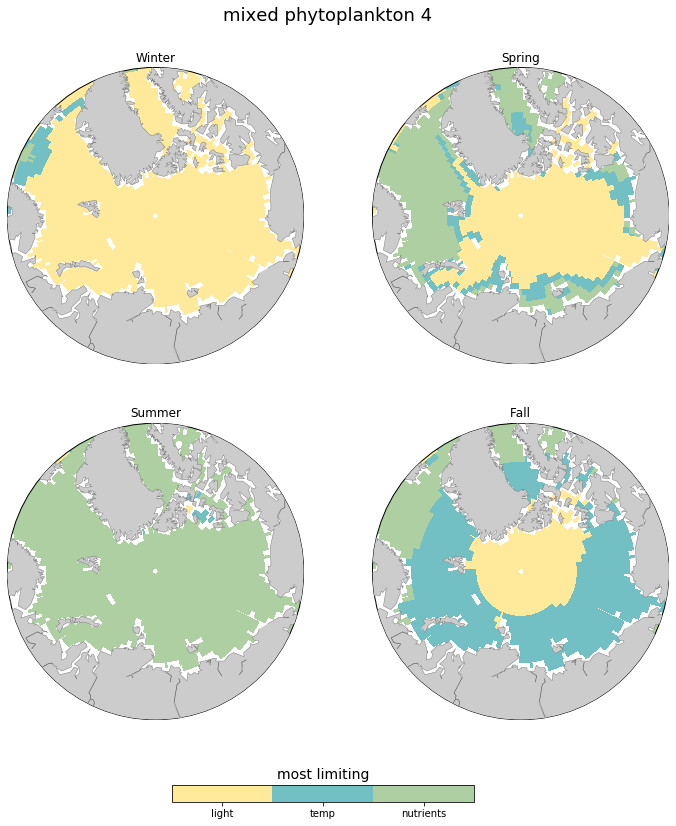

In [50]:
fig = plt.figure(figsize=(12,12))

# Winter
ax = fig.add_subplot(221) 
ax.set_title("Winter")
m.pcolormesh(x,y,np.nanmean(mp4_index[list(range(2)) + [-1]], axis=0),shading='flat',cmap=cm, vmin =0, vmax =3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


# Spring
ax = fig.add_subplot(222) 
ax.set_title("Spring")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.pcolormesh(x,y,np.nanmean(mp4_index[2:5,:,:], axis=0),shading='flat',cmap=cm,vmin =0, vmax =3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


# Summer
ax = fig.add_subplot(223) 
ax.set_title("Summer")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
im = m.pcolormesh(x,y,np.nanmean(mp4_index[5:8,:,:], axis=0),shading='flat',cmap=cm,vmin =0, vmax =3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)

# Fall
ax = fig.add_subplot(224) 
ax.set_title("Fall")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
im = m.pcolormesh(x,y,np.nanmean(mp4_index[8:11,:,:], axis=0),shading='flat',cmap=cm,vmin =0, vmax =3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


fig.suptitle('mixed phytoplankton 4', x=0.5, y=.95,fontsize=18)
cbar_ax = fig.add_axes([0.32, 0.03, 0.35, 0.02])
cbar = fig.colorbar(cf, cax=cbar_ax, shrink=0.5, spacing='uniform',ticks=[0.5,1.5,2.5,3.5],orientation="horizontal")
cbar.ax.set_xticklabels(['light','temp', 'nutrients'])
cbar.ax.set_title('most limiting', fontsize = 14)
m.plot
plt.show()

fig.savefig('surf_lim_mp4_ao.png')